# SIMULACIÓN: LABORATORIO 1
### Entrega: jueves 29 de septiembre, 23:59 horas


### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [83]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [84]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    return p_value # Se añadió como retorno el valor de p_value

0.8388818398212265

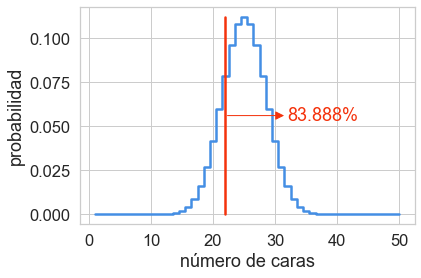

In [85]:
lanzaMoneda(22,50)


In [86]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 100  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
# lanzaMoneda(N_caras,N_exper)

P-value simulado: 77.0%


### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

In [87]:
# Si lanzaramos 50 veces una moneda, y 22 veces fuera cara, para una cantidad de 'n' experimentos tendríamos: p_value
# el cual es la probabilidad de que la salida sea mayor o igual que N_caras; si p_value = 0.8388
# significa que el 83.88% de las veces que se hizo el experimento se obtuvo 22 caras o más.

0.5397946186935894


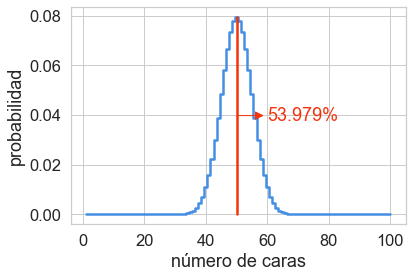

In [88]:
def lanzaSimulacion(n):
    """
    Simula el lanzamiento de una moneda equilibrada n veces
    Y retorna la probabilidad de que la salida sea mayor o igual que N_caras : p
    """
    M = 0
    N_caras = 50
    N_exper = 100
    for i in range(n):
        #genera N_exper valores aleatorios 0 o 1
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1

    p_simulado = M / n
    return p_simulado

p_binom = lanzaMoneda(50,100)
print(p_binom)

In [89]:
# (1.ii)
# Para contextualizar:
# ( * ) Tenemos un experimento estadístico, el cuál está programado en 'lanzaMoneda(n_caras, n_experimentos)', este ocupa el método de la distribución binomial
# para calcular la probabilidad de que ocurra un evento, en este caso, el número de caras que se obtendrán en n_experimentos lanzamientos de una moneda equilibrada.

# ( * ) A su vez tenemos una simulación, el cuál se sustenta en una cantidad de 'n' experimentos, en los cuales se generan valores aleatorios para el resultado de cada lanzamiento de la moneda,
# y se calcula la probabilidad de que la cantidad de caras sea mayor o igual a 22.

# Ejemplo n=2, n_caras= 5, n_exper = 10
# n=1 -> [0 1 1 0 1 0 1 0 1 0] -> El arreglo tiene un largo 10, y 5 caras
# n=2 -> [1 1 1 1 1 0 1 1 1 1] -> El arreglo tiene un largo 10, y 9 caras
# Por ende, bajo esos resultados p sería 1 (100%) ya que en ambos casos se obtuvo 5 caras o más. Mientras más experimentos tengamos, más cercano será el p_simulado a p_value (binomial).

p_simulados = []
p_simulado = 0
n = 10
while (round(p_simulado, 3) != round(p_binom, 3)):
    p_simulado = lanzaSimulacion(n)
    p_simulados.append(p_simulado)
    n +=10

In [90]:
# Iteraciones de n para que p_simulado sea "igual" a p_value
print(len(p_simulados))
# Construimos un arreglo con los valores de n utilizados
n_range = np.arange(10, 10*len(p_simulados)+10, 10)

35


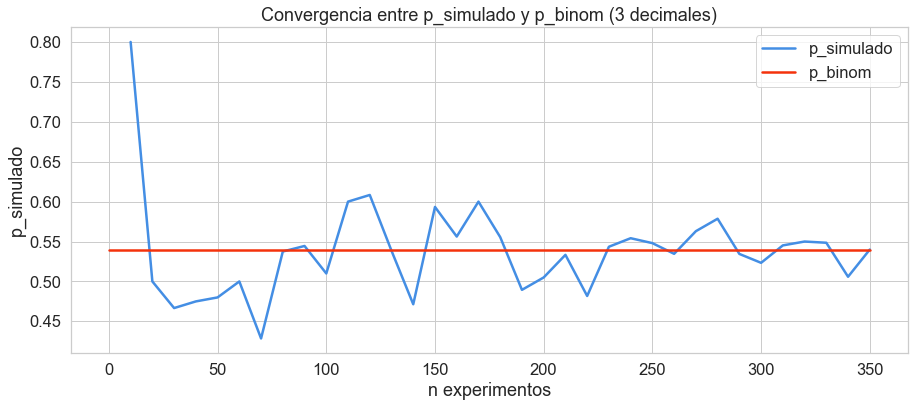

Cada set de experimentos (n=10 hasta n=350, step = 10) se realizó con N_exper=100 veces, para N_caras=50 veces


In [91]:
plt.figure(figsize=(15, 6))
# Graficamos los valores de p_simulado en función de n
plt.plot(n_range, p_simulados, color=azul)

# marcamos p_binom
plt.plot((0, n_range[-1]), (p_binom, p_binom), color=rojo)

# info gráfica
plt.legend(['p_simulado', 'p_binom'])
plt.title('Convergencia entre p_simulado y p_binom (3 decimales)')
plt.xlabel('n experimentos')
plt.ylabel('p_simulado')
plt.show();
print(f"Cada set de experimentos (n={n_range[0]} hasta n={n_range[-1]}, step = 10) se realizó con N_exper=100 veces, para N_caras=50 veces")

### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

In [92]:
# (1.iii)
# Sea un set F = [a,b,c,d] todas las formas de ordenarlo serían:
# F = [a,b,c,d], [a,b,d,c], [a,c,b,d], [a,c,d,b], [a,d,b,c], [a,d,c,b], [b,a,c,d], [b,a,d,c], [b,c,a,d], [b,c,d,a], [b,d,a,c], [b,d,c,a],
#     [c,a,b,d], [c,a,d,b], [c,b,a,d], [c,b,d,a], [c,d,a,b], [c,d,b,a], [d,a,b,c], [d,a,c,b], [d,b,a,c], [d,b,c,a], [d,c,a,b], [d,c,b,a]
# La cantidad de formas de ordenar un set de 4 elementos es 24 = 4! = 4 * 3 * 2 * 1

# a sería ganador en 6 de las 24 posibles combinaciones -> 3! = 3 * 2 * 1

In [93]:
# ganador finalista mencion_honorosa perdedor4 perdedor5 perdedor6 perdedor7 perdedor8 perdedor9 perdedor10 perdedor11 perdedor12


In [94]:
import pandas as pd
import numpy as np
import random

In [95]:
positions = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
cont = 0
#create array np
conts = np.array([])
n = 1000
N_exper = 100

<img src="probabilidades.jpeg">

In [96]:
# Probabilidad de A 
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(positions[0]==1):
            cont += 1

    conts = np.append(conts, cont/N_exper)
    cont = 0
    
print(conts.mean())

0.08276


In [97]:
# Probabilidad de B 
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(np.where(positions == 2)[0][0] > 2):
            cont += 1
   
    conts = np.append(conts, cont/N_exper)
    cont = 0
    
print(conts.mean())

0.74115


<img src="1.jpeg">

In [98]:
# Probabilidad de A Union B 
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(positions[0]==1):
            cont += 1
        if(positions[0]==1 or np.where(positions == 2)[0][0] > 2):
            cont += 1
    
    conts = np.append(conts, cont/N_exper)
    cont = 0
print(conts.mean())

0.8379500000000001


<img src="2.jpeg">

In [99]:
# Probabilidad de A Interseccion B 
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(positions[0]==1 and np.where(positions == 2)[0][0] > 2):
            cont += 1
    conts = np.append(conts, cont/N_exper)
    cont = 0
    
print(conts.mean())

0.0664


<img src="3.jpeg">

In [100]:
# Probabilidad de A Interseccion B Interseccion C
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(positions[0]==1 and np.where(positions == 2)[0][0] > 2 and positions[2]==3):
            cont += 1
    conts = np.append(conts, cont/N_exper)
    cont = 0
    
print(conts.mean())

0.006730000000000001


<img src="4.jpeg">

In [101]:
# Probabilidad de A Union ( B Interseccion C )
conts = np.array([])

for i in range(n):
    for j in range(1, N_exper):
        random.shuffle(positions)
        if(positions[0]==1 or ( np.where(positions == 2)[0][0] > 2 and positions[2]==3)):
            cont += 1
    conts = np.append(conts, cont/N_exper)
    cont = 0
    
print(conts.mean())

0.14223000000000002


## Comparación entre los resultados obtenidos
R: Entre la simulación y los valores reales calculados a mano hay discrepancias muy pequeñas, esto se debe a que la simulación tiene un comportamiento pseudoaleatorio, teniendo esto en cuenta los valores pueden variar, así mismo, si la simulación se itera, los resultados podrían ser más exactos

### Pregunta 3

(i)  Demuestre (b) y (c) en la propiedad de Independencia.

(ii) Demuestre el Teorema de las Probabiliades totales.


<img src="3-12.jpg">
<img src="3-1.jpg">

<img src="ultima.jpg">

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.